**IMPORTING LIBRARIES AND ESSENTIAL PACKAGES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import random
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential


**CREATING THE DATAFRAME OUT OF DIRECTORIES AND FILES**

In [2]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':
            if dir_name.split()[-1] != 'GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name,filename))
data = pd.DataFrame(columns=['path','label'])
data['path'] = path
data['label'] = label
data

path            label
0     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
...                                                 ...              ...
8995  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8996  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8997  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8998  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8999  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream

[9000 rows x 2 columns]

**EXPLORATORY DATA ANALYSIS**

In [3]:
print(data.head(7))
print(data['label'].value_counts())

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
5  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
6  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64


<Axes: xlabel='label'>

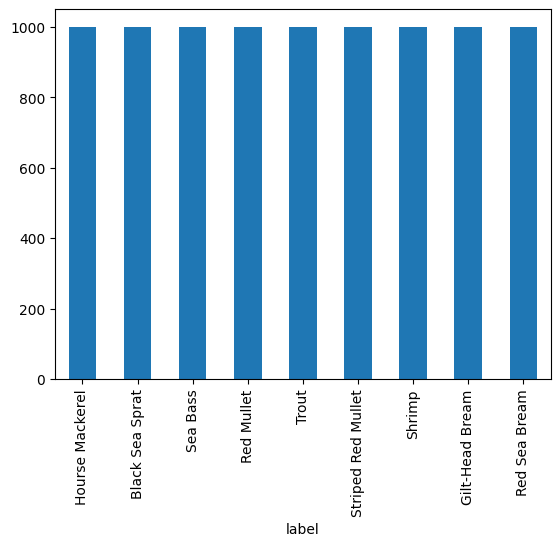

In [4]:
# Visualizing the labels and the samples they contain

data['label'].value_counts().plot(kind='bar')

**As we can see there are equal number of samples in each label, so we don't need to worry about the minority classes.**


**We have 1000 samples in each nine classes. These samples are enough, we don't need to practice data augmentation.**

In [5]:
#Printing the total number of distinct labels.
print("Labels: ", (", ".join(data['label'].unique())))
print("Number of Unique Labels: ", len(data['label'].unique()))

Labels:  Hourse Mackerel, Black Sea Sprat, Sea Bass, Red Mullet, Trout, Striped Red Mullet, Shrimp, Gilt-Head Bream, Red Sea Bream
Number of Unique Labels:  9


In [6]:
for unique_label in data['label'].unique():
    print(data.loc[data['label'] == unique_label].iloc[0,0])

/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Trout/Trout/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream/00929.png


**GETTING THE DATA READY FOR TRAINING**

In [7]:
# Seperating data (80% for train, 20% for test).

X = data.drop(columns=['label'])  # Dropping 'label' since it is the target .
y = data['label']  # Assigning 'label' as "y" since it is the target we want to predict.

# Seperating train and test sets. (80% for train, 20% for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Seperating train set as train and validation. (20% of train set is validation set now)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Examining the sets.
print("Train Set Length:", len(X_train))
print("Validation Set Length:", len(X_val))
print("Test Set Length:", len(X_test))
print()

# 
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print()

print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


Train Set Length: 5760
Validation Set Length: 1440
Test Set Length: 1800

X_train shape: (5760, 1)
X_val shape: (1440, 1)
X_test shape: (1800, 1)

y_train shape: (5760,)
y_val shape: (1440,)
y_test shape: (1800,)


In [8]:
import torch
from torchvision import transforms
from PIL import Image

# Normalizing and transforming images to tensors 
transform = transforms.Compose([
    transforms.Resize((224,224)), # Resizing because free kaggle can't process large tensors
    transforms.ToTensor()  # Transforming images to tensors
                           # This step will also normalize the values
])

# Function to load images as tensors out of paths
def load_images_as_tensors(image_paths):
    tensors = []
    for path in image_paths:
        image = Image.open(path).convert("RGB")  # Loading image and converting it to RGB
        tensor = transform(image)  # Transforming image
        tensor = tensor.view(-1)  # Flattening
        tensors.append(tensor)
    return torch.stack(tensors)

#Getting the paths of images from dataframe column and creating a image path list.
train_image_paths = X_train['path'].tolist()
val_image_paths = X_val['path'].tolist()
test_image_paths = X_test['path'].tolist()


X_train_tensors = load_images_as_tensors(train_image_paths)
X_val_tensors = load_images_as_tensors(val_image_paths)
X_test_tensors = load_images_as_tensors(test_image_paths)




print("X_train Tensor size:", X_train_tensors.shape)
print("X_val Tensor size:", X_val_tensors.shape)
print("X_test Tensor size:", X_test_tensors.shape)



X_train Tensor size: torch.Size([5760, 150528])
X_val Tensor size: torch.Size([1440, 150528])
X_test Tensor size: torch.Size([1800, 150528])


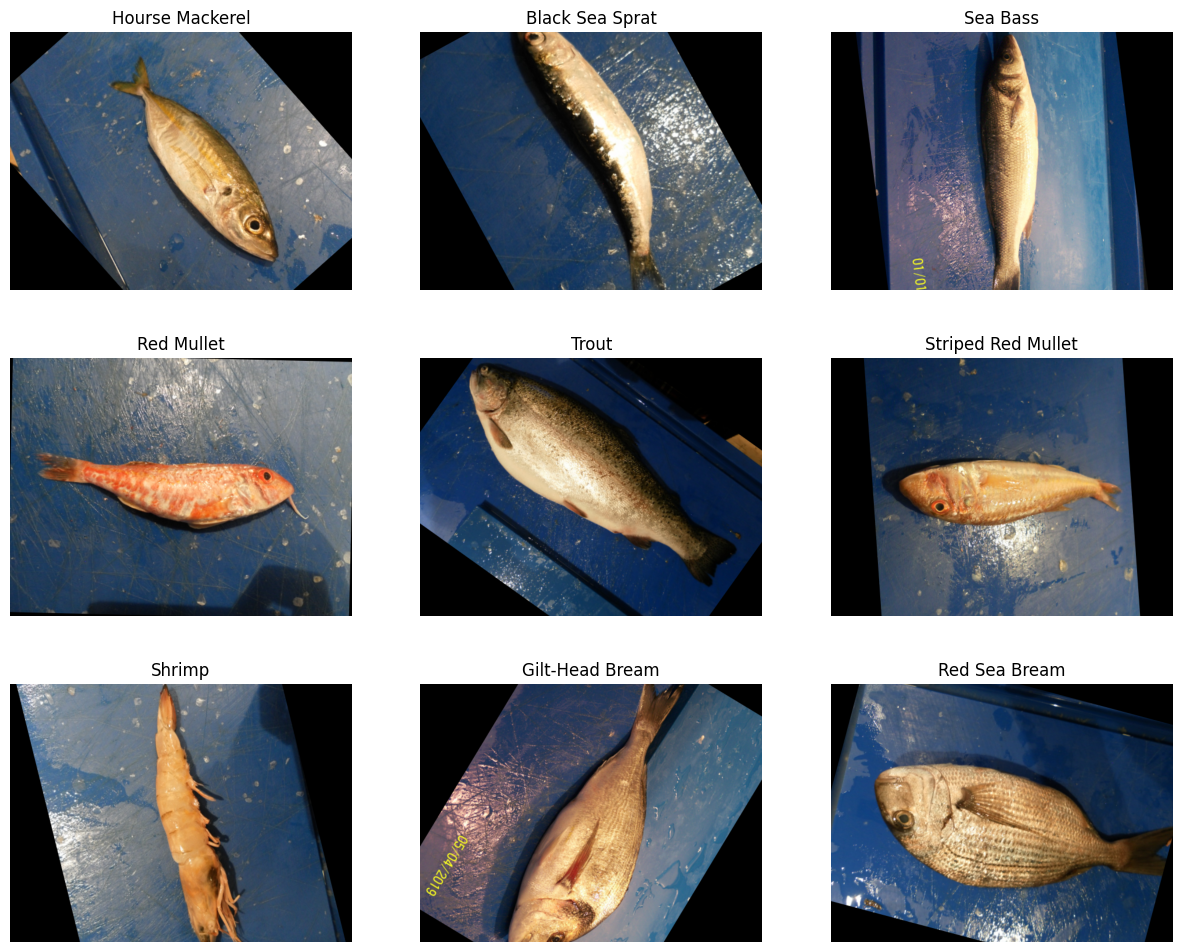

In [9]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in data['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(data[data['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

In [10]:
# LABEL ENCODING

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Transforming strings into integers
y_val_encoded = label_encoder.transform(y_val)          # Transforming strings into integers
y_test_encoded = label_encoder.transform(y_test)        # Transforming strings into integers


In [11]:
# ONE HOT ENCODING

y_train_one_hot = to_categorical(y_train_encoded, num_classes=9)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=9)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=9)


In [12]:
y_train_one_hot[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [13]:
# Defining early stopping and learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate scheduler fonksiyonu
def lr_scheduler(epoch, lr):
    if epoch > 10:  # 10. epoch'tan sonra öğrenme oranını azalt
        return lr * 0.9
    return lr

# Defining sequential model
model = Sequential()
model.add(Input(shape=(150528,)))

# Input layer
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))  

# We've tried dropout but it has negative effect on learning. 
# And the learning is better without dropout in this practice.

# We've used batch normalization since it has positive effects on model.

# Hidden layers
model.add(Dense(512, activation='relu'))  # Hidden layer 1
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))  # Hidden layer 2
model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))  # Hidden layer 3
model.add(BatchNormalization())
#model.add(Dropout(0.3))

# Output layer
# Since we have 9 classes, it is a multiclass problem we use softmax activation
model.add(Dense(9, activation='softmax'))

# Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy'])

# Training the model
results = model.fit(
    X_train_tensors,
    y_train_one_hot,
    epochs=30,
    batch_size=128,
    validation_data=(X_val_tensors, y_val_one_hot),
    callbacks=[early_stopping, LearningRateScheduler(lr_scheduler)]
)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.4094 - categorical_accuracy: 0.4094 - loss: 1.8724 - val_accuracy: 0.1715 - val_categorical_accuracy: 0.1715 - val_loss: 14.8137 - learning_rate: 0.0010
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6601 - categorical_accuracy: 0.6601 - loss: 0.9744 - val_accuracy: 0.2986 - val_categorical_accuracy: 0.2986 - val_loss: 4.7023 - learning_rate: 0.0010
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7801 - categorical_accuracy: 0.7801 - loss: 0.6458 - val_accuracy: 0.4292 - val_categorical_accuracy: 0.4292 - val_loss: 2.4717 - learning_rate: 0.0010
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8554 - categorical_accuracy: 0.8554 - loss: 0.4272 - val_accuracy: 0.5521 - val_categorical_accuracy: 0.5521 - val_loss: 1.5308 - learning_rate: 0.0010
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9146 - categorical_accuracy: 0.9146 - loss: 0.2674 - val_accuracy: 0.8

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │   154,141,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 464,511,005 (1.73 GB)

 Trainable params: 154,835,721 (590.65 MB)

 Non-trainable params: 3,840 (15.00 KB)

 Optimizer params: 309,671,444 (1.15 GB)

**EXAMINING THE RESULTS VISUALLY**

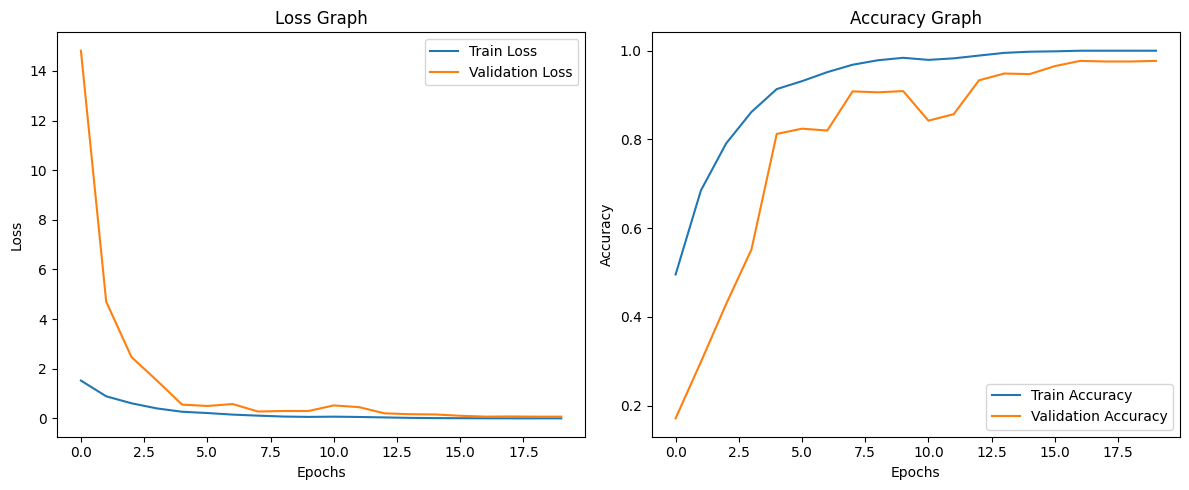

In [15]:
# VisualizingEğitim sonuçlarını görselleştirelim
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**TESTING THE MODEL WITH TEST SET**

In [16]:
# Examining the model with test inputs.
y_pred = model.predict(X_test_tensors)
y_pred_classes = np.argmax(y_pred, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step


In [17]:
y_pred_classes

array([4, 8, 6, ..., 0, 4, 6])

In [18]:
y_test_encoded

array([4, 8, 6, ..., 0, 4, 6])

In [19]:
# Evaluating model with test inputs
trainset_results = model.evaluate(X_train_tensors, y_train_one_hot, verbose=0)
testset_results = model.evaluate(X_test_tensors, y_test_one_hot, verbose=0)
print("Train set results:", trainset_results)  
print("Test set results:", testset_results)  
print()

# Assigning
train_loss = trainset_results[0]
train_accuracy = trainset_results[1]

test_loss = testset_results[0]
test_accuracy = testset_results[1]

print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print()
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Train set results: [0.0008245081407949328, 1.0, 1.0]
Test set results: [0.09718836098909378, 0.9638888835906982, 0.9638888835906982]

Train Loss: 0.0008245081407949328
Train Accuracy: 1.0

Test Loss: 0.09718836098909378
Test Accuracy: 0.9638888835906982


**EXAMINING TEST SET -> VISUALIZING SAMPLES AND COMPARING TRUE AND PREDICTED LABELS**

In [20]:
# Since y_pred_classes only has encoded classes, we decode its encodes to labels again to examine them.

y_pred_str_lbl = label_encoder.inverse_transform(y_pred_classes)
print("Type of y_pred_str_lbl: ", type(y_pred_str_lbl))
print("y_pred_str_lbl: ", y_pred_str_lbl)


Type of y_pred_str_lbl:  <class 'numpy.ndarray'>
y_pred_str_lbl:  ['Red Sea Bream' 'Trout' 'Shrimp' ... 'Black Sea Sprat' 'Red Sea Bream'
 'Shrimp']


In [21]:
# Adjusting y_test type so that y_pred_str_lbl and y_test_np are both numpy arrays

print("Type of y_test: ", type(y_test))
y_test_np = y_test.to_numpy()
print("Type of y_test_np: ", type(y_test_np))
print("y_test_np: ", y_test_np)




Type of y_test:  <class 'pandas.core.series.Series'>
Type of y_test_np:  <class 'numpy.ndarray'>
y_test_np:  ['Red Sea Bream' 'Trout' 'Shrimp' ... 'Black Sea Sprat' 'Red Sea Bream'
 'Shrimp']


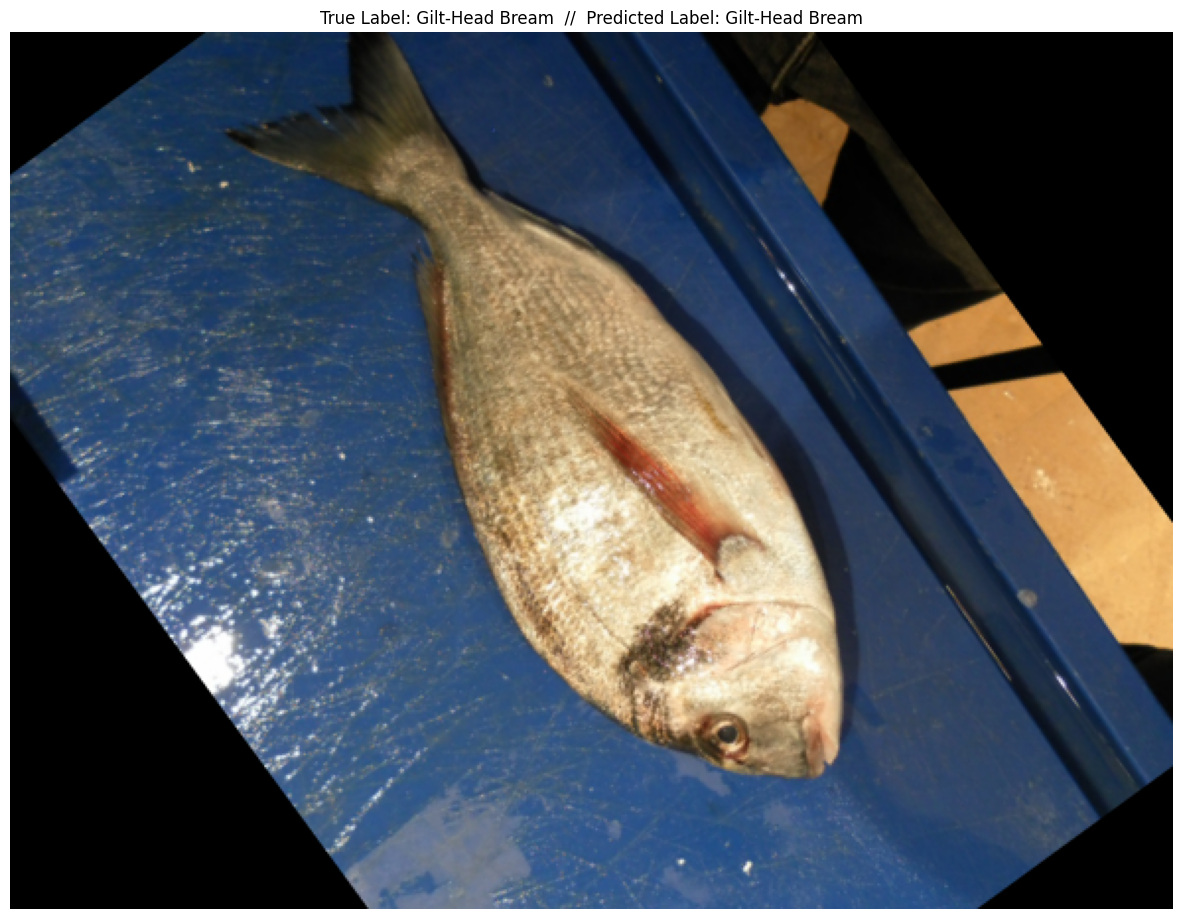

In [22]:
# Visualizing random samples with its true and predicted labels.

rnd = random.randint(0, len(X_test))

plt.figure(figsize=(15,12))
plt.imshow(plt.imread(test_image_paths[rnd]))
plt.title("True Label: " + y_test_np[rnd] + "  //  Predicted Label: " + y_pred_str_lbl[rnd])
plt.axis('off')
plt.show()

In [23]:
# The model predicted 52 samples wrong and 1748 samples true.

comparison = y_test_np == y_pred_str_lbl
comparison = pd.DataFrame(comparison)
comparison.value_counts()

0    
True     1735
False      65
Name: count, dtype: int64

<Axes: xlabel='Predicted Right?', ylabel='count'>

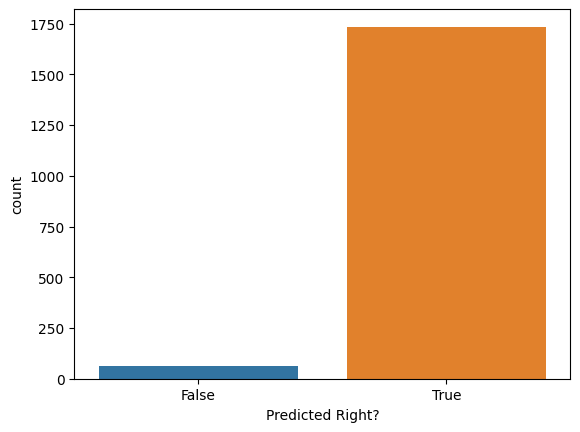

In [24]:
# Visualizing the quality of predictions.

comparison = comparison.rename(columns={0: "Predicted Right?"})
sns.countplot(data=comparison, x="Predicted Right?")

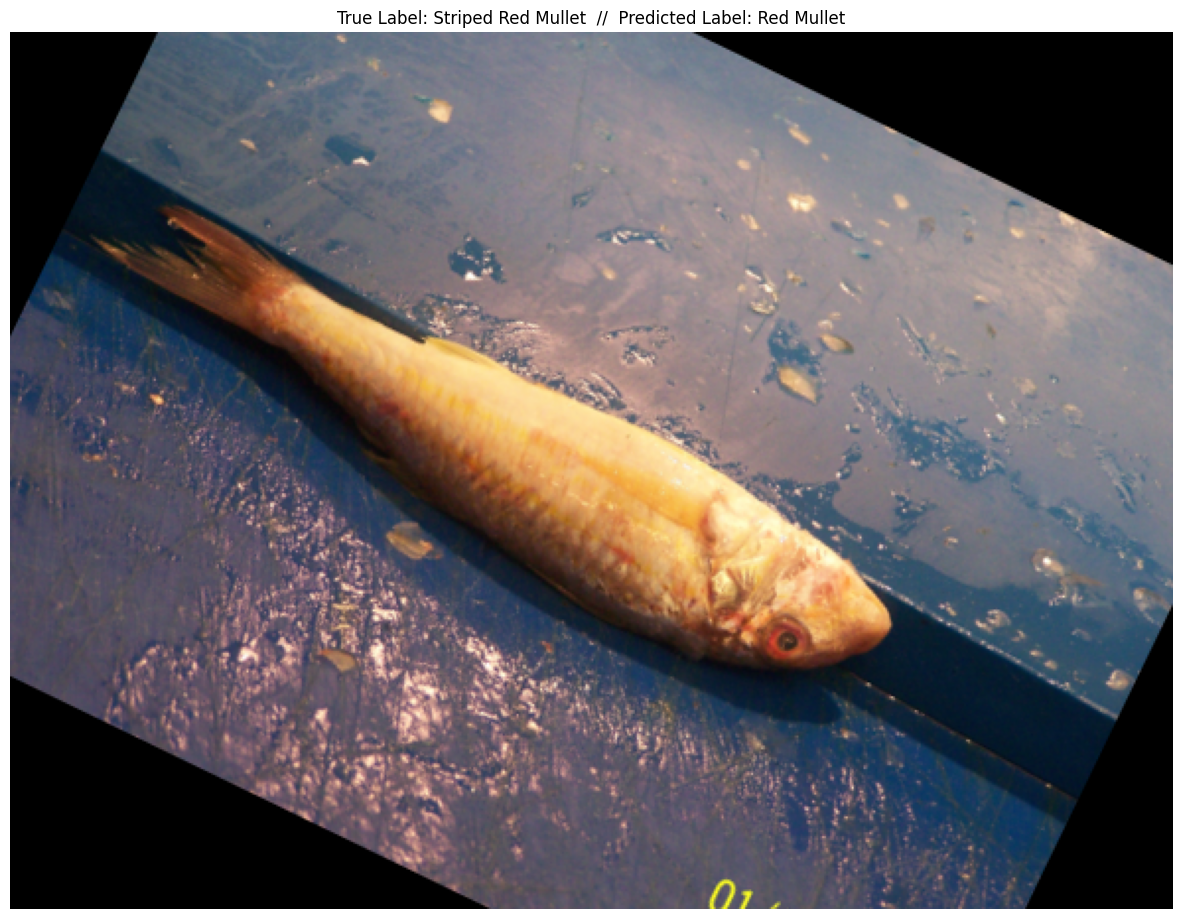

In [25]:
# Visualizing only mispredictions randomly on each run.

while (y_test_np[rnd] == y_pred_str_lbl[rnd]):
    rnd = random.randint(0, len(X_test))

plt.figure(figsize=(15,12))
plt.imshow(plt.imread(test_image_paths[rnd]))
plt.title("True Label: " + y_test_np[rnd] + "  //  Predicted Label: " + y_pred_str_lbl[rnd])
plt.axis('off')

rnd = random.randint(0, len(X_test))